This notebook walks through the steps for performing PCA and t-SNE clustering on nanopore data from four human tissue samples numbered as follows:

* 0: aorta
* 1: adrenal gland
* 2: bladder
* 3: lymph node

In [1]:
# For Python 3
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
classes = range(4) # tissue types will be labeled 0-3 based on the description above

In [3]:
# Load dataset of shape (1200, 1000) which contains a 1000 datapoint window of normalized nanopore current observations 
# from 300 example capture events from each class (1200 examples total).
# Also load corresponding class label for each capture event.
all_captures = np.load('clustering_example_dataset.npy')
all_classes = np.load('clustering_example_labels.npy')
print(np.shape(all_captures))
print(np.shape(all_classes))

(1200, 1000)
(1200,)


In [4]:
# Extract five features from each capture: [mean, standard deviation, minimum, maximum, median]
all_features = []
for cap in all_captures:
    all_features.append([np.mean(cap), np.std(cap), np.min(cap), np.max(cap), np.median(cap)])
print(np.shape(all_features))

(1200, 5)


In [5]:
# standardize features using score z = (x - u) / s
# where x = original datapoint, u = mean, s = standard deviation
X = StandardScaler().fit_transform(all_features)

# PCA

In [6]:
# Perform PCA on standardized dataset
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)

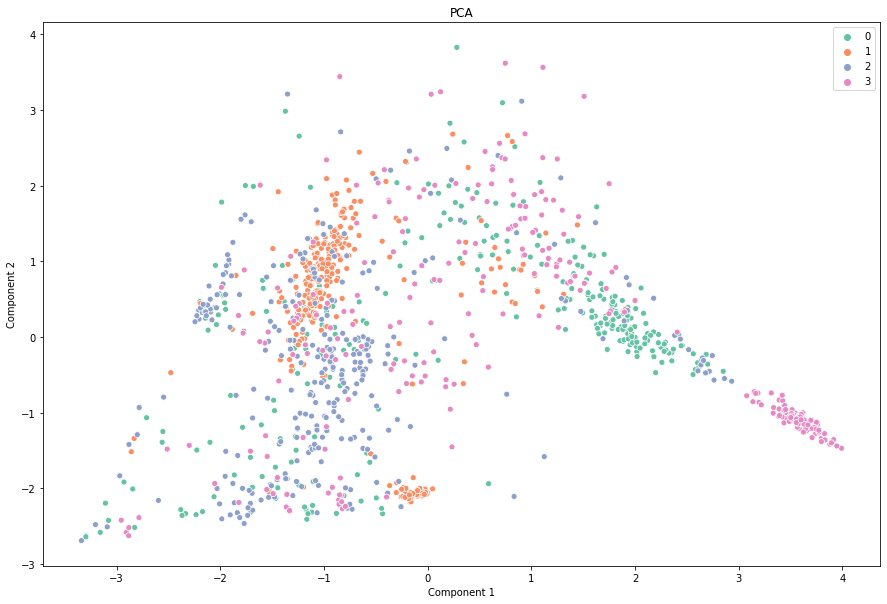

In [7]:
# Plot PCA results
plt.figure(figsize=(15,10))
sns.scatterplot(principalComponents[:,0], principalComponents[:,1], hue=all_classes, legend='full',
                palette=sns.color_palette("Set2")[:len(classes)])
plt.title('PCA')
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

# t-SNE

In [8]:
# Perform t-SNE on standardized dataset
X_embedded = TSNE(perplexity=50, learning_rate=200, n_iter=500, early_exaggeration=12).fit_transform(X)

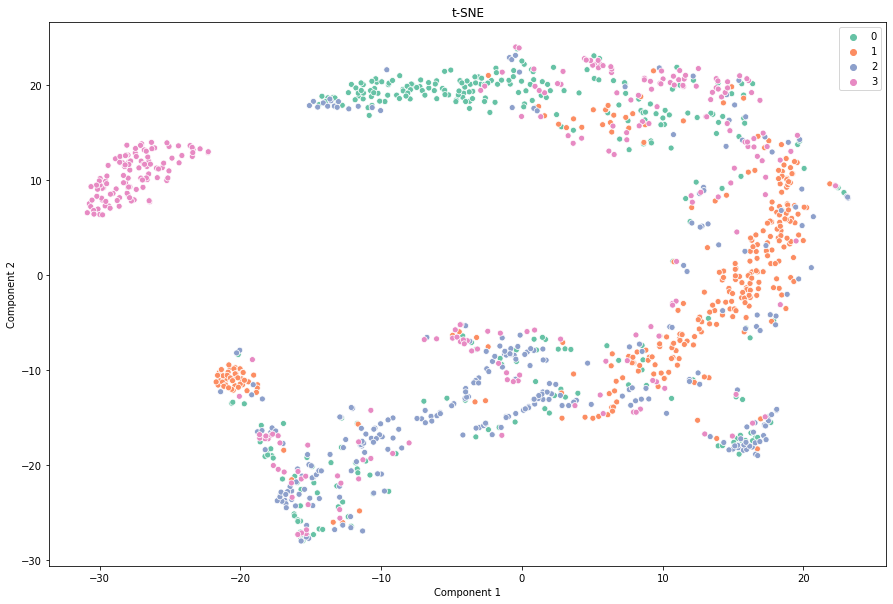

In [9]:
# Plot t-SNE results
plt.figure(figsize=(15,10))
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=all_classes, legend='full',
                palette=sns.color_palette("Set2")[:len(classes)])
plt.title('t-SNE')
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()